In [1]:
import matplotlib.pyplot as plt
import pickle
import re

In [91]:
train_metrics_loss=[]
test_metrics_loss=[]
train_metrics_f1=[]
test_metrics_f1=[]
train_metrics_acc=[]
test_metrics_acc=[]
train_metrics_cm=[]
test_metrics_cm=[]
for i in range(1,10):
    path_test = f'C:/Users/aless/Documents/432_results/TSGL/train/test_metrics_sub{i}.pkl' 
    path_train = f'C:/Users/aless/Documents/432_results/TSGL/train/valid_metrics_sub{i}.pkl' 
    with open(path_test, 'rb') as file:
        test_metrics = pickle.load(file)
    with open(path_train, 'rb') as file:
        valid_metrics = pickle.load(file)
    #print(valid_metrics)
    #print(valid_metrics)
    train_metrics_loss.append(valid_metrics['loss'])
    test_metrics_loss.append(test_metrics['loss'])
    train_metrics_f1.append(valid_metrics['f1'])
    test_metrics_f1.append(test_metrics['f1'])
    train_metrics_acc.append(valid_metrics['acc'])
    test_metrics_acc.append(test_metrics['acc'])
    train_metrics_cm.append(test_metrics['cm'])
    test_metrics_cm.append(test_metrics['cm'])
# You can extract other metrics similarly if available
#print("length:",len(train_metrics_loss))

In [90]:
# Initialize lists to store data
epochs_total = []
train_losses_total = []
valid_losses_total = []
valid_f1_scores_total = []
valid_accuracies_total = []
valid_confusion_matrices_total = []

train_metrics=[]
test_metrics=[]
# Regular expression pattern to extract data
#pattern = r'epoch: (\d+), .* train loss: ([-+]?\d*\.\d+|\d+) .* valid loss: ([-+]?\d*\.\d+|\d+), valid f1: ([-+]?\d*\.\d+|\d+), valid acc: ([-+]?\d*\.\d+|\d+), valid cm: \[\[(.*?)\]\]'
pattern_tl = r'train loss: ([-+]?\d*\.\d+|\d+)'
pattern_vl = r'valid loss: ([-+]?\d*\.\d+|\d+)'
pattern_vf = r'valid f1: ([-+]?\d*\.\d+|\d+)'
pattern_va = r'valid acc: ([-+]?\d*\.\d+|\d+)'
pattern_ep = r'epoch: (\d+)'
pattern_vc = r'valid cm: (\[\[(?:\d*\d+\d*)]\])'
# Open and read the file
for i in range(1,10):
    epochs = []
    train_losses = []
    valid_losses = []
    valid_f1_scores = []
    valid_accuracies = []
    valid_confusion_matrices = []
    path = f'C:/Users/aless/Documents/432_results/IDL/train/train_log_sub{i}.txt' 
    with open(path, 'r') as file:
        lines = file.readlines()
    print("path:",path)
    print("length lines:",len(lines))
    # Parse each line
    for line in lines:
        #print("line:",line)
        #print("pattern",pattern_tl)
        match1 = re.search(pattern_tl, line)
        match2 = re.search(pattern_vl, line)
        match3 = re.search(pattern_vf, line)
        match4 = re.search(pattern_va, line)
        match5 = re.search(pattern_ep, line)
        #match6 = re.search(pattern_vc, line)
        #print("match1",match1)
        #print("match2",match2)
        #print("match3",match3)
        #print("match4",match4)
        #print("match5",match5)
        #print("match6",match6)
        if match1 and match2 and match3 and match4 and match5 :
            #print("hello!:",match1.group(1))
            epoch = int(match5.group(1))
            train_loss = float(match1.group(1))
            valid_loss = float(match2.group(1))
            valid_f1 = float(match3.group(1))
            valid_acc = float(match4.group(1))
            #valid_cm = [[int(num) for num in row.split()] for row in match6.group(6).split(', ')]
        
            epochs.append(epoch)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_f1_scores.append(valid_f1)
            valid_accuracies.append(valid_acc)
            #valid_confusion_matrices.append(valid_cm)

    epochs_total.append(epochs.copy())
    #print(f"length:{epochs_total[0]}")

    print(f"length epochs_total:{len(epochs_total)}")
    train_losses_total.append(train_losses.copy())
    valid_losses_total.append(valid_losses.copy())
    valid_f1_scores_total.append(valid_f1_scores.copy())
    valid_accuracies_total.append(valid_accuracies.copy())
print(f"length:{len(epochs_total)}")
print(f"length:{len(train_losses_total)}")

path: C:/Users/aless/Documents/432_results/IDL/train/train_log_sub1.txt
length lines: 3056
length epochs_total:1
path: C:/Users/aless/Documents/432_results/IDL/train/train_log_sub2.txt
length lines: 3056
length epochs_total:2
path: C:/Users/aless/Documents/432_results/IDL/train/train_log_sub3.txt
length lines: 3056
length epochs_total:3
path: C:/Users/aless/Documents/432_results/IDL/train/train_log_sub4.txt
length lines: 3056
length epochs_total:4
path: C:/Users/aless/Documents/432_results/IDL/train/train_log_sub5.txt
length lines: 3056
length epochs_total:5
path: C:/Users/aless/Documents/432_results/IDL/train/train_log_sub6.txt
length lines: 3056
length epochs_total:6
path: C:/Users/aless/Documents/432_results/IDL/train/train_log_sub7.txt
length lines: 3056
length epochs_total:7
path: C:/Users/aless/Documents/432_results/IDL/train/train_log_sub8.txt
length lines: 3056
length epochs_total:8
path: C:/Users/aless/Documents/432_results/IDL/train/train_log_sub9.txt
length lines: 3056
lengt

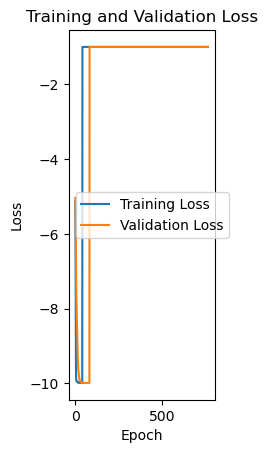

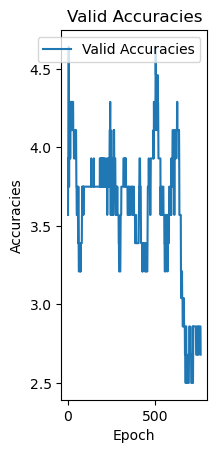

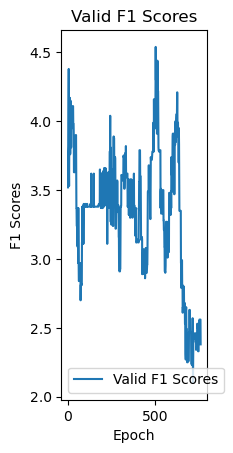

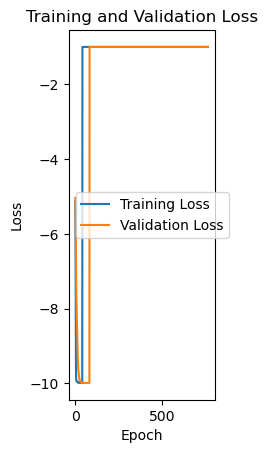

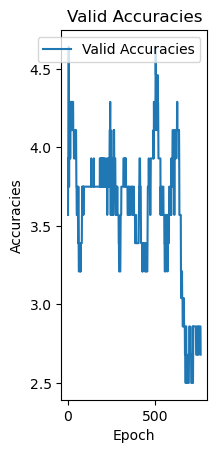

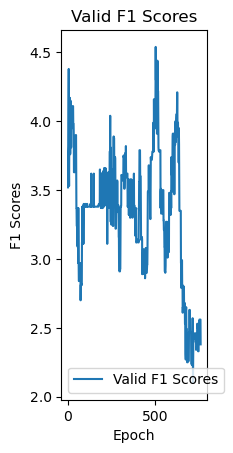

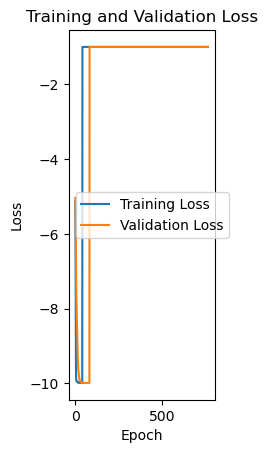

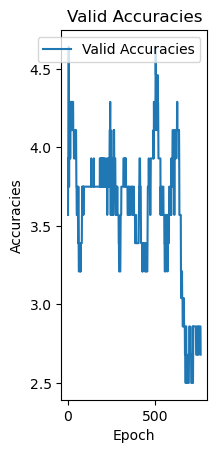

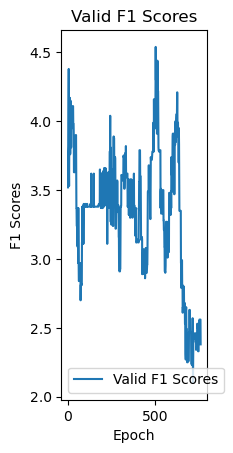

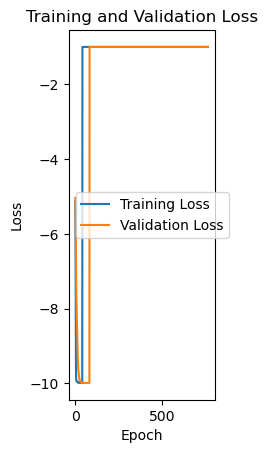

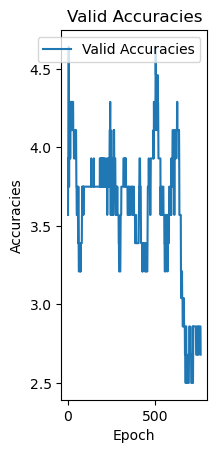

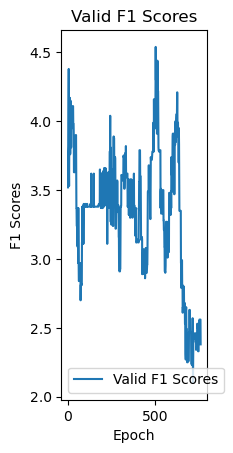

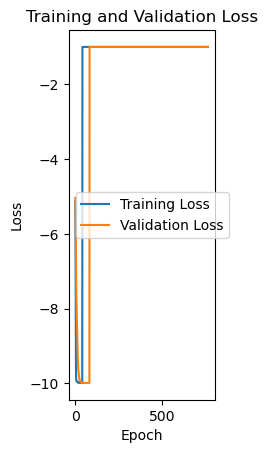

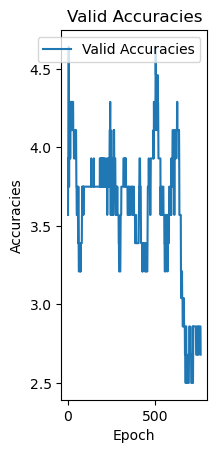

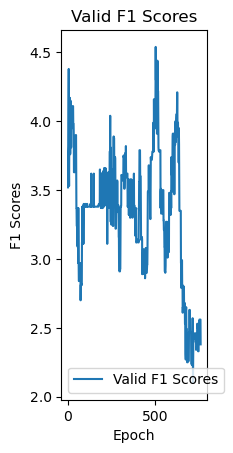

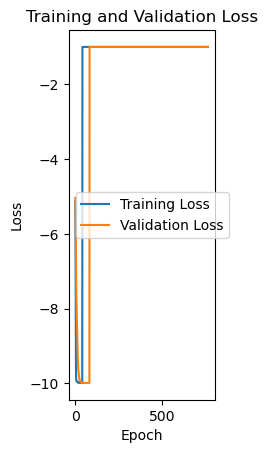

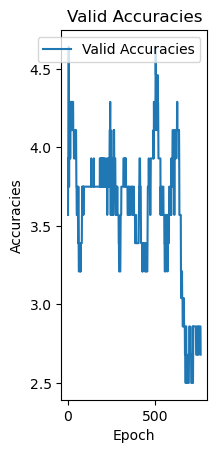

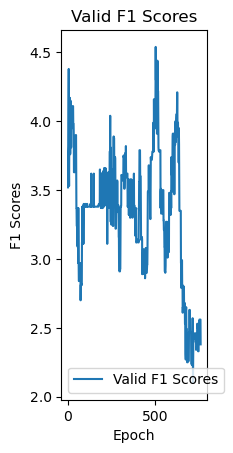

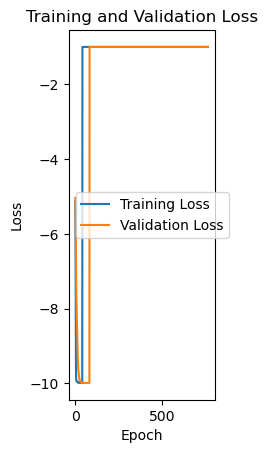

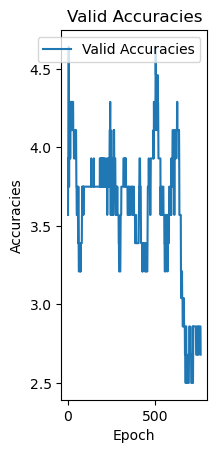

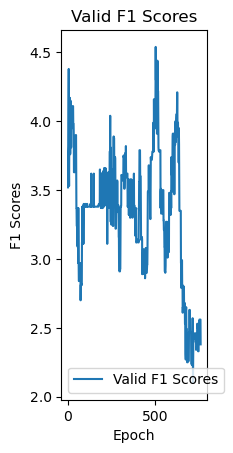

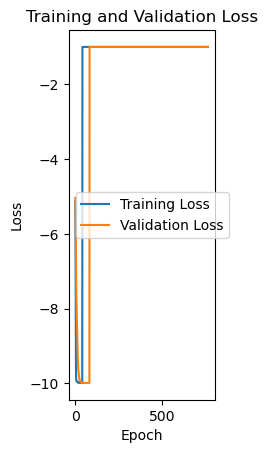

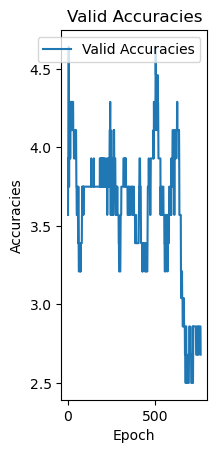

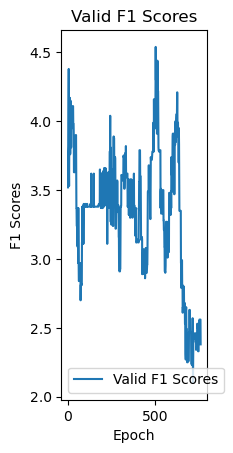

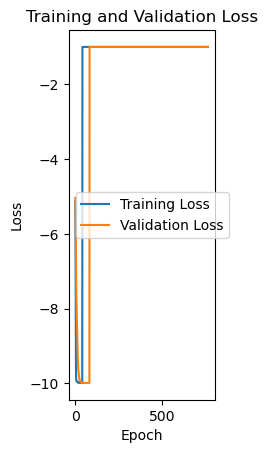

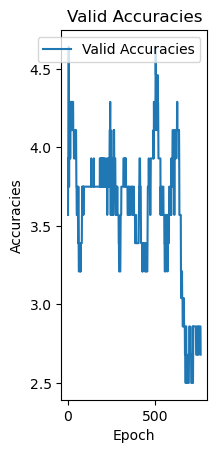

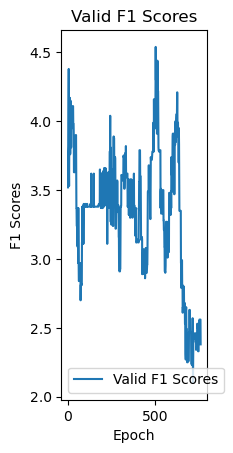

In [84]:
# Plot training loss and validation loss
#print(list(range(0,len(valid_losses))))
for i in range(1,10):
    plt.subplot(1, 3,1)
    plt.plot(list(range(0,len(train_losses))), train_losses, label='Training Loss')
    plt.plot(list(range(0,len(valid_losses))), valid_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    plt.subplot(1, 3,2)
    plt.plot(list(range(0,len(valid_accuracies))), valid_accuracies, label='Valid Accuracies')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracies')
    plt.title('Valid Accuracies')
    plt.legend()
    plt.show()

    plt.subplot(1, 3,3)
    plt.plot(list(range(0,len(valid_f1_scores))), valid_f1_scores, label='Valid F1 Scores')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Scores')
    plt.title('Valid F1 Scores')
    plt.legend()
    plt.show()

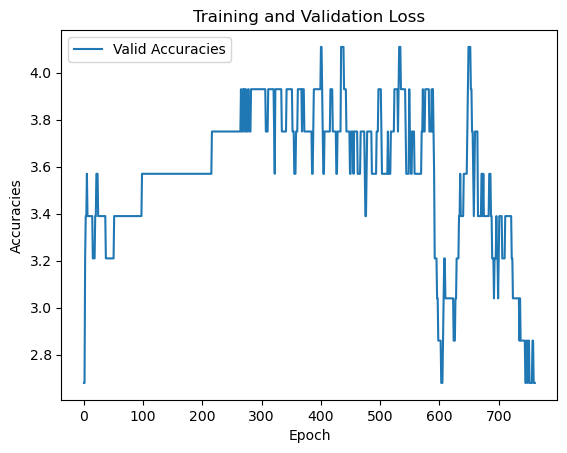

In [120]:
train_metrics_loss=[]
test_metrics_loss=[]
train_metrics_f1=[]
test_metrics_f1=[]
train_metrics_acc=[]
test_metrics_acc=[]
train_metrics_cm=[]
test_metrics_cm=[]
for i in range(1,10):
    path_test = f'C:/Users/aless/Documents/432_results/CRDNN/lstm/PART2/train/test_metrics_sub{i}.pkl' 
    path_train = f'C:/Users/aless/Documents/432_results/CRDNN/lstm/PART2/train/valid_metrics_sub{i}.pkl' 
    with open(path_test, 'rb') as file:
        test_metrics = pickle.load(file)
    with open(path_train, 'rb') as file:
        valid_metrics = pickle.load(file)
    #print(valid_metrics)
    #print(valid_metrics)
    train_metrics_loss.append(valid_metrics['loss'])
    test_metrics_loss.append(test_metrics['loss'])
    train_metrics_f1.append(valid_metrics['f1'])
    test_metrics_f1.append(test_metrics['f1'])
    train_metrics_acc.append(valid_metrics['acc'])
    test_metrics_acc.append(test_metrics['acc'])
    train_metrics_cm.append(test_metrics['cm'])
    test_metrics_cm.append(test_metrics['cm'])
# You can extract other metrics similarly if available
#print("length:",len(train_metrics_loss))

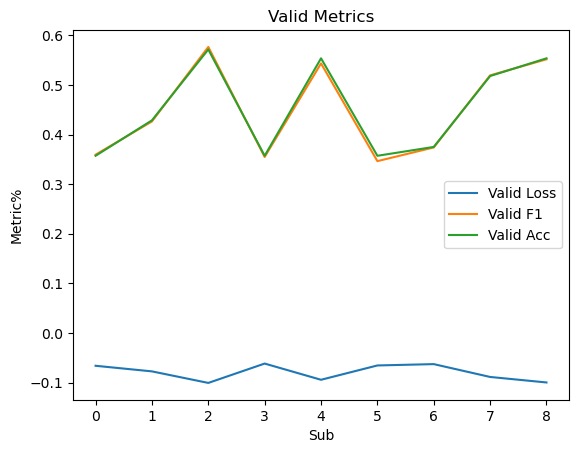

In [121]:
# Plot test loss
plt.plot(list(range(0,len(train_metrics_loss))), train_metrics_loss, label='Valid Loss')
plt.plot(list(range(0,len(train_metrics_f1))), train_metrics_f1, label='Valid F1')
plt.plot(list(range(0,len(train_metrics_acc))), train_metrics_acc, label='Valid Acc')
#plt.plot(list(range(0,len(train_metrics_cm))), train_metrics_cm, label='Valid CM')
plt.xlabel('Sub')
plt.ylabel('Metric%')
plt.title('Valid Metrics')
plt.legend()
plt.show()


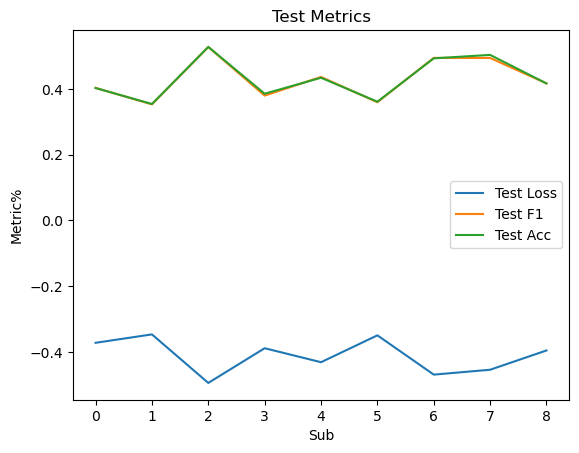

In [122]:
plt.plot(list(range(0,len(test_metrics_loss))), test_metrics_loss, label='Test Loss')
plt.plot(list(range(0,len(test_metrics_f1))), test_metrics_f1, label='Test F1')
plt.plot(list(range(0,len(test_metrics_acc))), test_metrics_acc, label='Test Acc')
#plt.plot(list(range(0,len(test_metrics_cm))), test_metrics_cm, label='Test CM')
plt.xlabel('Sub')
plt.ylabel('Metric%')
plt.title('Test Metrics')
plt.legend()
plt.show()

In [126]:
#IDL TEST
train_metrics_loss=[]
test_metrics_loss=[]
train_metrics_f1=[]
test_metrics_f1=[]
train_metrics_acc=[]
test_metrics_acc=[]
train_metrics_cm=[]
test_metrics_cm=[]
for i in range(1,10):
    path_test = f'C:/Users/aless/Documents/432_results/CRDNN/lstm/PART2/test/test_metrics_sub{i}.pkl' 
    path_train = f'C:/Users/aless/Documents/432_results/CRDNN/lstm/PART2/test/valid_metrics_sub{i}.pkl' 
    with open(path_test, 'rb') as file:
        test_metrics = pickle.load(file)
    with open(path_train, 'rb') as file:
        valid_metrics = pickle.load(file)
    #print(valid_metrics)
    #print(valid_metrics)
    train_metrics_loss.append(valid_metrics['loss'])
    test_metrics_loss.append(test_metrics['loss'])
    train_metrics_f1.append(valid_metrics['f1'])
    test_metrics_f1.append(test_metrics['f1'])
    train_metrics_acc.append(valid_metrics['acc'])
    test_metrics_acc.append(test_metrics['acc'])
    train_metrics_cm.append(test_metrics['cm'])
    test_metrics_cm.append(test_metrics['cm'])
# You can extract other metrics similarly if available


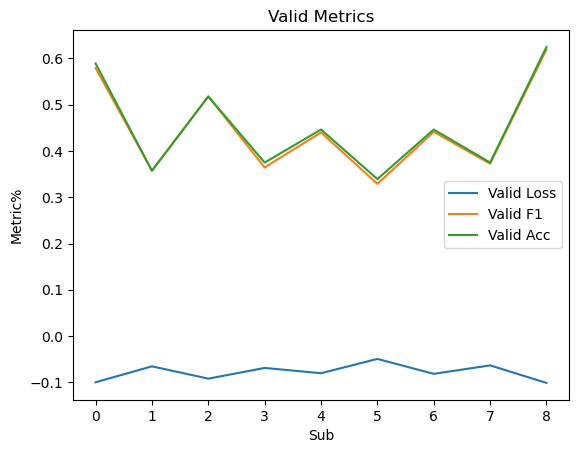

In [127]:
# Plot test loss
plt.plot(list(range(0,len(train_metrics_loss))), train_metrics_loss, label='Valid Loss')
plt.plot(list(range(0,len(train_metrics_f1))), train_metrics_f1, label='Valid F1')
plt.plot(list(range(0,len(train_metrics_acc))), train_metrics_acc, label='Valid Acc')
#plt.plot(list(range(0,len(train_metrics_cm))), train_metrics_cm, label='Valid CM')
plt.xlabel('Sub')
plt.ylabel('Metric%')
plt.title('Valid Metrics')
plt.legend()
plt.show()

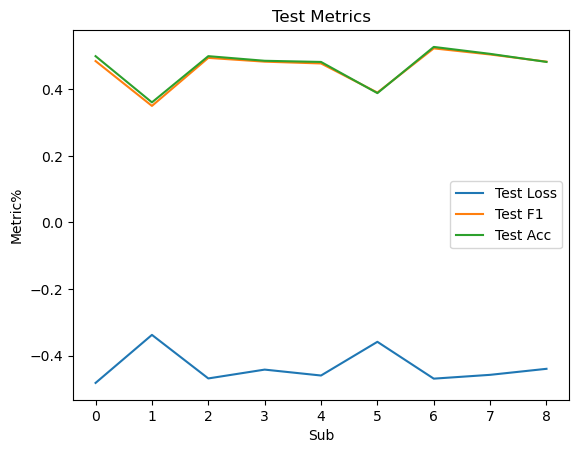

In [128]:
plt.plot(list(range(0,len(test_metrics_loss))), test_metrics_loss, label='Test Loss')
plt.plot(list(range(0,len(test_metrics_f1))), test_metrics_f1, label='Test F1')
plt.plot(list(range(0,len(test_metrics_acc))), test_metrics_acc, label='Test Acc')
#plt.plot(list(range(0,len(test_metrics_cm))), test_metrics_cm, label='Test CM')
plt.xlabel('Sub')
plt.ylabel('Metric%')
plt.title('Test Metrics')
plt.legend()
plt.show()